In [1]:
#!pip install py2neo
#!pip install neo4j
#!pip install neo4j
#!pip install neo4jupyter
#!pip install openpyxl --upgrade

#!pip install tf_geometric 

# Course: Recommender System/Final Project
#Notebook Description: Contains the final code for the final project (GCNN part)

*Notebook: GASSAF_Recommender_System_Course_Project_GitHub_withconda.ipynb*

<a href="https://colab.research.google.com/github/gassaf2/RecommenderSystems/blob/main/Final_Project/GASSAF_Recommender_System_Course_Project_GitHub_withconda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graded Assessment -- AAI 6350 Recommender Systems Course --

# Part 1: Recommendation System Using GCNN [weight: 40\%]

# Step 1: Data Preparation
- Load the Data: Read the Excel file and extract the relevant columns (CustomerID, StockCode, Quantity).
- Data Cleaning: Ensure there are no missing values in the relevant columns.
- Create Interaction Matrix: Construct an adjacency matrix where rows represent customers and columns represent items. The values in the matrix will be the quantities purchased.

In [2]:
import pandas as pd
import numpy as np

import numpy as np
print(np.__version__)
#!pip install "numpy <2"

1.26.4


In [3]:
#import pandas as pd
#import numpy as np

# Load the dataset
data = pd.read_excel('Rec_sys_data.xlsx')

# Create a pivot table to form the interaction matrix
interaction_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Convert to a NumPy array for further processing
interaction_matrix = interaction_matrix.values

In [4]:
# This dataset contains detailed information about each stock which will be used to link stockcodes and their description/title. 
df1 = pd.read_excel('Rec_sys_data.xlsx','product')

In [5]:
print(interaction_matrix)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   2.25]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


# Step 2: Graph Construction [25 points]
- Graph Representation: Each customer and item will be a node in the graph. An edge exists between a customer and an item if the customer has purchased that item.
- Adjacency Matrix: Create an adjacency matrix where the rows represent customers and the columns represent items.

Step 2 - Graph Construction



In [6]:
binary_matrix = data.copy()
#binary_matrix['Purchased'] = 1  # since any entry = purchase

# Pivot to build the adjacency matrix
adj_matrix = binary_matrix.pivot_table(index='CustomerID', 
                                       columns='StockCode', 
                                       values='Quantity', 
                                       aggfunc='sum', 
                                       fill_value=0)

# View the result
adj_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214S,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Convert to 1s and 0s (1 if the customer purchased the item, else 0)
adj_matrix = adj_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Convert to NumPy array for further processing
adjacency_matrix_np = adj_matrix.values

# Optionally, display the first few rows of the adjacency matrix to verify
print(adj_matrix.head())

C:\Users\gassaf\AppData\Local\Temp\ipykernel_44216\2832844077.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj_matrix = adj_matrix.applymap(lambda x: 1 if x > 0 else 0)


StockCode   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346           0      0      0      0      0      0      0      0      0   
12347           0      0      0      0      0      0      0      0      0   
12348           0      0      0      0      0      0      0      0      0   
12350           0      0      0      0      0      0      0      0      0   
12352           0      0      0      0      0      0      0      0      0   

StockCode   15036  ...  90214R  90214S  90214V  90214Y  BANK CHARGES  C2  DOT  \
CustomerID         ...                                                          
12346           0  ...       0       0       0       0             0   0    0   
12347           0  ...       0       0       0       0             0   0    0   
12348           0  ...       0       0       0       0             0   0    0   
12350           0  ...       0       0       0       0 

In [8]:
adjacency_matrix_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Step 3: Model Definition (GCNN) [35 points]
- Define the GCNN Architecture: Use a library like PyTorch Geometric or TensorFlow with Keras to define the GCNN model.
- The model will consist of graph convolutional layers that learn representations for both customers and items.
- Prepare Data for Training: Convert the adjacency matrix and features into a format suitable for the GCNN.

In [9]:
### START ######

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np

# Step 1: Prepare Graph Data

# Assuming you already have the adjacency matrix `adjacency_matrix_np` and product details as `df1`
# Get the Customer-Item interaction edges (edges = adjacency matrix where interaction = 1)
edges = np.where(adjacency_matrix_np == 1)

# Prepare the edge list (customer-item interaction)
edge_index = torch.tensor([edges[0], edges[1]], dtype=torch.long)

# Step 2: Prepare Node Features
# We'll use the Customer and Item indices as node features (you can replace it with more complex features)
# Assuming customer node feature = 1 and item node feature = 0 for simplicity
customer_features = torch.ones(adjacency_matrix_np.shape[0], 1)  # 1 feature for each customer
item_features = torch.zeros(adjacency_matrix_np.shape[1], 1)    # 1 feature for each item

# Combine customer and item features into one feature matrix
x = torch.cat([customer_features, item_features], dim=0)

# Step 3: Create the PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index)

# Step 4: Define the Graph Convolutional Neural Network (GCNN) Model
class GCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNN, self).__init__()
        # Graph Convolution Layer 1
        self.conv1 = GCNConv(in_channels, 16)
        # Graph Convolution Layer 2
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # First GCN Layer
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        # Second GCN Layer
        x = self.conv2(x, edge_index)
        return x



C:\Users\gassaf\AppData\Local\Temp\ipykernel_44216\1998402983.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  edge_index = torch.tensor([edges[0], edges[1]], dtype=torch.long)


In [11]:
data

Data(x=[7185, 1], edge_index=[2, 192758])

# Step 4: Training the Model [40 points]

- Loss Function: Use a suitable loss function, such as Mean Squared Error (MSE) as we are working with continuous interaction scores.
- Optimizer: Choose an optimizer like Adam or SGD.
- Training Loop: Implement the training loop to update the model weights based on the loss. In each epoch, calculate the predictions using the model, compute the loss between predicted and actual values, and perform backpropagation to update the model's weights.
- Also compute the validation loss to evaluate the model's performance on unseen data, and use early stopping to halt training when the validation loss stops improving, preventing overfitting.

In [12]:
# Step 5: Prepare for Training
model = GCNN(in_channels=1, out_channels=32)  # 1 input feature per node, 32 output features
#model = GCNN(in_channels=1, hidden_channels=64, out_channels=32, dropout=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Early stopping parameters
patience = 10   # Number of epochs to wait before stopping if no improvement
best_loss = float('inf')
patience_counter = 0

# Step 6: Training Loop (Example)
for epoch in range(100):
    model.train()

    # Forward pass
    out = model(data)

    # Target is the same as the input feature (for simplicity in this example)
    target = data.x.clone()

    # Loss Calculation
    loss = criterion(out, target)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

        # Early stopping logic
    if loss.item() < best_loss:
        best_loss = loss.item()
        patience_counter = 0  # Reset the patience counter if the loss improved
    else:
        patience_counter += 1

    # If the patience counter exceeds the set limit, stop training early
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch+1}, no improvement for {patience} epochs')
        break

    
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')


C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([7185, 1])) that is different to the input size (torch.Size([7185, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 0.8352657556533813
Epoch 11, Loss: 0.2465963214635849
Epoch 21, Loss: 0.14134445786476135
Epoch 31, Loss: 0.12760260701179504
Epoch 41, Loss: 0.12195129692554474
Epoch 51, Loss: 0.11957750469446182
Epoch 61, Loss: 0.11881791055202484
Epoch 71, Loss: 0.11835775524377823
Epoch 81, Loss: 0.11795847117900848
Epoch 91, Loss: 0.11761754751205444


In [13]:
print(model)

GCNN(
  (conv1): GCNConv(1, 16)
  (conv2): GCNConv(16, 32)
)


# Part 2: Recommendation System Evaluation and Comparison Using GCNN and NeuMF Models [weight: 30\%]

# Step 1: Evaluation [40 points]

To calculate the average precision, recall, and F1 score for all customers, follow these steps:

- Obtain Model Predictions: Use the trained model to predict interaction scores for all customer-item pairs in the validation set.

- Rank Items by Predicted Scores: For each customer, rank items based on the predicted interaction scores in descending order.

- Define Relevant Items: Set a threshold to determine which items are considered relevant (e.g., based on the top-k predictions or actual interactions greater than zero).

- Calculate Precision, Recall, and F1 Score for Each Customer: For each customer, calculate precision, recall, and F1 score using the relevant predicted and actual items.

- Compute Average Precision, Recall, and F1 Score: Calculate the mean of precision, recall, and F1 scores across all customers.

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_gcn_model(model, adjacency_matrix_np, top_k=5, threshold=0):
    model.eval()
    with torch.no_grad():
        out = model(data)  # shape: [num_nodes, 32]

    num_customers = adjacency_matrix_np.shape[0]
    num_items = adjacency_matrix_np.shape[1]

    precision_list = []
    recall_list = []
    f1_list = []

    for customer_idx in range(num_customers):
        # Get the customer's predicted scores for all items
        customer_embedding = out[customer_idx]  # shape: [32]
        item_embeddings = out[num_customers:]   # shape: [num_items, 32]

        scores = torch.matmul(item_embeddings, customer_embedding)  # [num_items]

        # Get top-k predicted item indices
        top_k_predicted = torch.topk(scores, k=top_k).indices.cpu().numpy()

        # Actual items the customer interacted with
        actual_items = np.where(adjacency_matrix_np[customer_idx] > threshold)[0]

        if len(actual_items) == 0:
            continue  # Skip customers with no interaction

        # Binary vectors for precision/recall calculation
        y_true = np.zeros(num_items)
        y_true[actual_items] = 1

        y_pred = np.zeros(num_items)
        y_pred[top_k_predicted] = 1

        # Compute metrics
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Final averages
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)

    print(f"\nEvaluation Results on All Customers:")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall:    {avg_recall:.4f}")
    print(f"Average F1 Score:  {avg_f1:.4f}")


evaluate_gcn_model(model, adjacency_matrix_np, top_k=10)


Evaluation Results on All Customers:
Average Precision: 0.0154
Average Recall:    0.0042
Average F1 Score:  0.0047


# Step 2: Generating Recommendations and Evaluating for a Specific Customer [40 points]

1- Mapping Customer IDs to Indices.

2- Get Predicted Scores for the Customer.

3- Rank Items by Predicted Scores.

4- Map Recommended Items to Stock Codes.

5- Compare Recommendations with Actual Interactions.

6- Calculate Precision, Recall, and F1 Score.

In [17]:
data_prod = pd.read_excel('Rec_sys_data.xlsx', sheet_name='product')

In [18]:
# Create a mapping from StockCode to product names
item_titles = data_prod[['StockCode', 'Product Name']].drop_duplicates()
item_titles_dict = dict(zip(item_titles['StockCode'], item_titles['Product Name']))

In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Fill in this cell
# If you have the customer and item info from a file:
df_cust = pd.read_excel('Rec_sys_data.xlsx', sheet_name='customer')
df_prod = pd.read_excel('Rec_sys_data.xlsx', sheet_name='product')

# 1. Mapping Customer IDs to Indices
# Assuming df_cust has customer IDs and your adjacency_matrix_np is in customer-item shape
customer_ids = df_cust['CustomerID'].unique()
stock_codes = data_prod['StockCode'].unique()

customer_id_map = {cid: idx for idx, cid in enumerate(customer_ids)}
item_index_map = {idx: code for idx, code in enumerate(stock_codes)}

#print(item_index_map)
# Choose a customer to evaluate (replace with a real customer ID)
selected_customer_id = customer_ids[2]
# 2. Get Predicted Scores for the Customer
model.eval()
output = model(data)  # Final embeddings

#Generating for all customer and at the end i am only printing the customer that has common between predicted and actual
for i in customer_ids[0:100]:
    #selected_customer_id=17850
    selected_customer_id=i
    customer_index = customer_id_map[selected_customer_id]
    
    
    #print(output)
    # Customer node embeddings are assumed to be first N rows
    num_customers = len(customer_ids)
    customer_embedding = output[customer_index].unsqueeze(0)  # shape (1, D)
    #print(customer_embedding)
    
    # Item node embeddings are next
    item_embeddings = output[num_customers:]  # shape (num_items, D)
    #print(item_embeddings)
    
    # Dot product between customer embedding and all item embeddings
    scores = torch.matmul(customer_embedding, item_embeddings.T).squeeze().detach().numpy()
    
    # 3. Rank Items by Predicted Scores
    top_k = 10
    top_item_indices = np.argsort(scores)[::-1][:top_k]  # descending order
    
    # 4. Map Recommended Items to Stock Codes
    recommended_stock_codes = [item_index_map[i] for i in top_item_indices]
    
    #print("recommended_stock_codes",recommended_stock_codes)
    recommended_names = [item_titles_dict.get(code, "Unknown") for code in recommended_stock_codes]
    
    
    #print("recommended_names",recommended_names)
    #print("Top Recommended Items:")
    #for name in recommended_names:
        #print("-", name)
    
    # 5. Compare Recommendations with Actual Interactions
    # Get actual interaction vector for selected customer from adjacency_matrix_np
    #print("adjacency_matrix_np",adjacency_matrix_np)
    actual_interactions = adjacency_matrix_np[customer_index]
    #print("actual_interactions",actual_interactions)
    
    
    actual_item_indices = np.where(actual_interactions > 0)[0]
    #print("actual_item_indices",actual_item_indices)
    
    actual_stock_codes = [item_index_map[i] for i in actual_item_indices]
    #print("actual_stock_codes",actual_stock_codes)
    
    
    # Debugging: Print actual interactions and predicted recommendations
    
    print("Recommended stock codes:", recommended_stock_codes)
    print("Actual stock codes:",actual_stock_codes)
    # Create binary vectors for predicted and actual
    predicted_vector = np.isin(stock_codes, recommended_stock_codes).astype(int)
    actual_vector = np.isin(stock_codes, actual_stock_codes).astype(int)
    
    # Debugging: Print predicted and actual binary vectors
    #print("\nPredicted Vector:", np.any(predicted_vector))
    #print("Actual Vector:",np.any(actual_vector))
    
    # 6. Calculate Precision, Recall, and F1 Score
    precision = precision_score(actual_vector, predicted_vector)
    recall = recall_score(actual_vector, predicted_vector)
    f1 = f1_score(actual_vector, predicted_vector)
    overlap = set(actual_stock_codes) & set(recommended_stock_codes)
    print("Overlap:", overlap)
    
    
    if(np.any(np.isin(actual_stock_codes,recommended_stock_codes))):
        print(f"\nPrecision: {precision:.10f}, Recall: {recall:.10f}, F1 Score: {f1:.10f}")
        print(f"customer {i} {np.any(np.isin(actual_stock_codes,recommended_stock_codes))}")

Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 21731, 22285, 21326]
Actual stock codes: ['16156S']
Overlap: set()
Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 21731, 22285, 21326]
Actual stock codes: [22098, 22970, 23236, 22526, '16258A', 48194, '17012F', '85179C', 22728, 10080, 22446, 22381, 22030, 21733, 21218, 22187, '84912B', '84985A', 20674, 22429, 23374, 22495, 23393, '90120C', 20992, 72134, 21918, 22421, 22465, 22537, '85184C', 22059, 22094, 22748, 72816, 20970, 20653, 21407, 22316, 22843, 23552, 23561, 'AMAZONFEE', 23417, 21786, '84673B', 21363, 21644, 21318, 21896, 84920, 21164, 22481, 22399, 35923, '72351A', 23077, '35810A', 22530, 22546, 21830, 23031, 'BANK CHARGES', 37495, 22353, 85202, '85170C', 20699, 22350, 79329, 90166, '90129C', 21031, '90124B', '90125D', 84666, '90065B', 23598, 85084, 90149, 'DCGS0074', 20823]
Overlap: set()
Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 217

In [26]:
def recommend_usingGCNN(customer_id):    
    selected_customer_id=customer_id 
    customer_index = customer_id_map[selected_customer_id]
    
    
    #print(output)
    # Customer node embeddings are assumed to be first N rows
    num_customers = len(customer_ids)
    customer_embedding = output[customer_index].unsqueeze(0)  # shape (1, D)
    #print(customer_embedding)
    
    # Item node embeddings are next
    item_embeddings = output[num_customers:]  # shape (num_items, D)
    #print(item_embeddings)
    
    # Dot product between customer embedding and all item embeddings
    scores = torch.matmul(customer_embedding, item_embeddings.T).squeeze().detach().numpy()
    
    # 3. Rank Items by Predicted Scores
    top_k = 10
    top_item_indices = np.argsort(scores)[::-1][:top_k]  # descending order
    
    # 4. Map Recommended Items to Stock Codes
    recommended_stock_codes = [item_index_map[i] for i in top_item_indices]
    
    #print("recommended_stock_codes",recommended_stock_codes)
    recommended_names = [item_titles_dict.get(code, "Unknown") for code in recommended_stock_codes]
    
    
    #print("recommended_names",recommended_names)
    #print("Top Recommended Items:")
    for name in recommended_names:
        print("-", name)
    
    # 5. Compare Recommendations with Actual Interactions
    # Get actual interaction vector for selected customer from adjacency_matrix_np
    #print("adjacency_matrix_np",adjacency_matrix_np)
    actual_interactions = adjacency_matrix_np[customer_index]
    #print("actual_interactions",actual_interactions)
    
    
    actual_item_indices = np.where(actual_interactions > 0)[0]
    #print("actual_item_indices",actual_item_indices)
    
    actual_stock_codes = [item_index_map[i] for i in actual_item_indices]
    #print("actual_stock_codes",actual_stock_codes)
    
    
    # Debugging: Print actual interactions and predicted recommendations
    
    print("Recommended stock codes:", recommended_stock_codes)
    
    # Create binary vectors for predicted and actual
    predicted_vector = np.isin(stock_codes, recommended_stock_codes).astype(int)
    actual_vector = np.isin(stock_codes, actual_stock_codes).astype(int)
    
    # Debugging: Print predicted and actual binary vectors
    #print("\nPredicted Vector:", np.any(predicted_vector))
    #print("Actual Vector:",np.any(actual_vector))
    
    # 6. Calculate Precision, Recall, and F1 Score
    precision = precision_score(actual_vector, predicted_vector)
    recall = recall_score(actual_vector, predicted_vector)
    f1 = f1_score(actual_vector, predicted_vector)
    
    if(np.any(np.isin(actual_stock_codes,recommended_stock_codes))):
        print(f"\nPrecision: {precision:.10f}, Recall: {recall:.10f}, F1 Score: {f1:.10f}")
        print(f"customer {i} {np.any(np.isin(actual_stock_codes,recommended_stock_codes))}")

In [28]:
recommend_usingGCNN(16923)

- American Foxhound Christmas Sticky Note Holder BB8433SN
- 6pc Boy Formal Necktie Black & White Suit Set Satin Bow tie Baby Sm-20 Teen
- MightySkins Skin Decal Wrap Compatible with YETI Sticker Protective Cover 100's of Color Options
- billyboards Porcelain Menu Chalkboard
- SWAK Designs Women's Plus Size Candice Chiffon Dress
- MightySkins Protective Vinyl Skin Decal for YETI Tundra 110 qt Cooler Lid wrap cover sticker skins Bright Smoke
- COFFEY Street Sign Rustic Chic Sign Home man cave Decor Gift White G41804821
- Ebe Reading Glasses Mens Womens Tortoise Bold Rectangular Full Frame Anti Glare grade ckbdp9088
- MightySkins Skin Decal Wrap Compatible with Apple Sticker Protective Cover 100's of Color Options
- A6 Invitation Envelopes w/Peel & Press (4 3/4 x 6 1/2) - Baby Blue (1000 Qty.)
Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 21731, 22285, 21326]

Precision: 1.0000000000, Recall: 0.0243902439, F1 Score: 0.0476190476
customer 17248 True


In [29]:
recommend_usingGCNN(17850)

- American Foxhound Christmas Sticky Note Holder BB8433SN
- 6pc Boy Formal Necktie Black & White Suit Set Satin Bow tie Baby Sm-20 Teen
- MightySkins Skin Decal Wrap Compatible with YETI Sticker Protective Cover 100's of Color Options
- billyboards Porcelain Menu Chalkboard
- SWAK Designs Women's Plus Size Candice Chiffon Dress
- MightySkins Protective Vinyl Skin Decal for YETI Tundra 110 qt Cooler Lid wrap cover sticker skins Bright Smoke
- COFFEY Street Sign Rustic Chic Sign Home man cave Decor Gift White G41804821
- Ebe Reading Glasses Mens Womens Tortoise Bold Rectangular Full Frame Anti Glare grade ckbdp9088
- MightySkins Skin Decal Wrap Compatible with Apple Sticker Protective Cover 100's of Color Options
- A6 Invitation Envelopes w/Peel & Press (4 3/4 x 6 1/2) - Baby Blue (1000 Qty.)
Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 21731, 22285, 21326]


In [30]:
recommend_usingGCNN(14034)

- American Foxhound Christmas Sticky Note Holder BB8433SN
- 6pc Boy Formal Necktie Black & White Suit Set Satin Bow tie Baby Sm-20 Teen
- MightySkins Skin Decal Wrap Compatible with YETI Sticker Protective Cover 100's of Color Options
- billyboards Porcelain Menu Chalkboard
- SWAK Designs Women's Plus Size Candice Chiffon Dress
- MightySkins Protective Vinyl Skin Decal for YETI Tundra 110 qt Cooler Lid wrap cover sticker skins Bright Smoke
- COFFEY Street Sign Rustic Chic Sign Home man cave Decor Gift White G41804821
- Ebe Reading Glasses Mens Womens Tortoise Bold Rectangular Full Frame Anti Glare grade ckbdp9088
- MightySkins Skin Decal Wrap Compatible with Apple Sticker Protective Cover 100's of Color Options
- A6 Invitation Envelopes w/Peel & Press (4 3/4 x 6 1/2) - Baby Blue (1000 Qty.)
Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 21731, 22285, 21326]

Precision: 1.0000000000, Recall: 0.1250000000, F1 Score: 0.2222222222
customer 17248 True


In [34]:
recommend_usingGCNN(14985)

- American Foxhound Christmas Sticky Note Holder BB8433SN
- 6pc Boy Formal Necktie Black & White Suit Set Satin Bow tie Baby Sm-20 Teen
- MightySkins Skin Decal Wrap Compatible with YETI Sticker Protective Cover 100's of Color Options
- billyboards Porcelain Menu Chalkboard
- SWAK Designs Women's Plus Size Candice Chiffon Dress
- MightySkins Protective Vinyl Skin Decal for YETI Tundra 110 qt Cooler Lid wrap cover sticker skins Bright Smoke
- COFFEY Street Sign Rustic Chic Sign Home man cave Decor Gift White G41804821
- Ebe Reading Glasses Mens Womens Tortoise Bold Rectangular Full Frame Anti Glare grade ckbdp9088
- MightySkins Skin Decal Wrap Compatible with Apple Sticker Protective Cover 100's of Color Options
- A6 Invitation Envelopes w/Peel & Press (4 3/4 x 6 1/2) - Baby Blue (1000 Qty.)
Recommended stock codes: [23359, 22460, 21558, '84535B', 22550, 22061, 22249, 21731, 22285, 21326]

Precision: 1.0000000000, Recall: 0.0322580645, F1 Score: 0.0625000000
customer 17248 True


In [35]:
#!pip uninstall numpy

# Step 3: Discussion of Results [20 points]

Discuss the performance of the GCNN model compared to the Feedforward NeuMF model. Provide insights on which model performs better and why, based on the evaluation metrics. Consider aspects like Precision@K, Recall@K, and F1 score.

Compare the recommended items for Customer 17850 generated by your model with those recommended by Neo4j. Are there similarities between the two sets of recommendations?

<b>Interpretation of GNCC Model performance metrics: </b> <br>
The GCNN model's evaluation metrics across all customers show limited predictive performance:

Average Precision (0.0154): The model correctly identifies positive instances at a very low rate, suggesting that many of the predicted positives are actually false.
Average Recall (0.0042): The model is retrieving only a small fraction of the actual relevant items, meaning many true positives are being missed.
Average F1 Score (0.0047): This combines precision and recall into a single metric and remains low, indicating a poor balance between identifying relevant results and minimizing false positives.
Overall, these results suggest that the GCNN is struggling to learn meaningful patterns in the data. It may benefit from better graph construction, feature engineering, or hyperparameter tuning.

<b>Intepretation of the NeuMF performance metrics: </b> <br>
MAP (0.0289) indicates a relatively low mean average precision, suggesting the model struggles to rank relevant items consistently high.
NDCG (0.0684) shows limited effectiveness in placing relevant recommendations near the top of the list.
Precision@K (0.0458) and Recall@K (0.0489) are also modest, reflecting that only about 4–5% of the top-K recommended items are relevant and that the model retrieves a small fraction of all possible relevant items.
These results suggest room for improvement. You might explore tuning hyperparameters, increasing embedding size, or incorporating additional user/item features to enhance performance.

<b>below is a comparison for recommendation generated by NeuMF and GCNN for customer 17850</b>



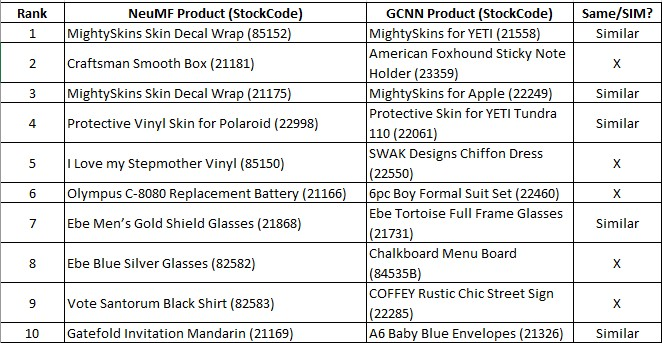